In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [25]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
r=0.1
# Discount rate=10%
Easment_value=3000
# per-acre price of a conservation easement  in year t
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005,'corridor_length':60}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005,'corridor_length':120}
#overhead_line={'underground':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'underground':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# underground= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
# corridor_length= length of the corridor in feet
###

In [5]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [6]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


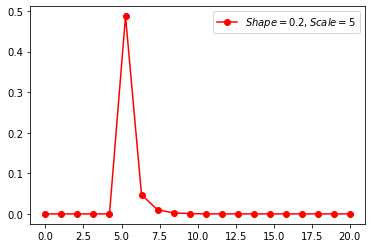

In [7]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')

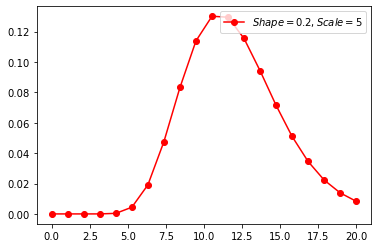

In [8]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, 10, 2)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [9]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [10]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


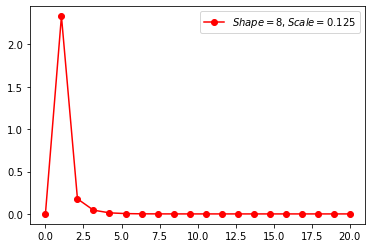

In [11]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, 0.5, 1)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

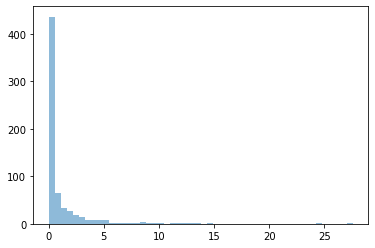

[1.31351162e+00 7.17886211e-03 4.23488037e-02 7.75329454e-01
 1.39089370e-02 3.46559114e-04 4.30266500e-02 3.51421366e-03
 1.37930686e-01 1.15094644e-02 2.41745154e-07 1.69201188e+00
 1.07030554e-01 8.09108580e-06 1.16507212e-01 1.05283843e+00
 2.36119815e+00 1.02504817e-03 8.98125096e-02 2.04558380e+00
 2.22990028e+00 1.61806711e+00 5.14246632e-04 3.45490144e-05
 1.69265969e-01 7.20624471e-02 2.06890099e-02 2.61203001e+00
 3.78058168e+00 1.49582566e+01 5.25227037e+00 1.74024907e-02
 6.09124776e-02 3.70611344e-01 3.49265783e-01 1.99764180e-01
 4.12104791e-04 3.32662579e-02 3.52867557e-01 4.18174998e-01
 1.27715938e-02 7.88805216e+00 6.08858995e+00 1.81750237e-06
 3.05425852e-01 1.19137842e-02 2.79651947e+00 2.93066130e-01
 2.61028707e-03 4.86582553e-04 2.46881975e+00 2.97826781e+00
 5.86618017e+00 5.48323589e-04 2.61859443e+00 5.80825176e-01
 9.45001226e-01 7.22346877e+00 3.08941403e-04 5.61412184e-02
 1.15932227e-02 7.96164172e-01 7.03369368e-03 1.55300602e+01
 4.01738692e-01 6.605459

In [12]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year

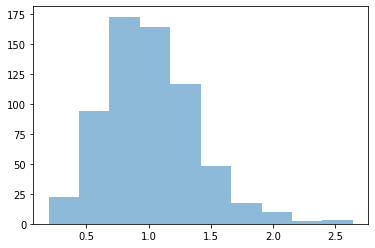

In [13]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [35]:
#Defining Circuit class with a new approach: ommiting for t from --- to --- from class methods.
###I still do not know without using for loop, how I can manage to generate some of the required outputs.
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        #self.replcost_rate=self.set_replcost_rate_array
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[0]
        self.underground_length_new=[0]
        #if self.underground[0]==1:
            #self.underground_length_new=[self.length]
        #else:
            #self.underground_length_new=[0]
        self.environmental_restoration=[0]
        
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list   
    def add_replcost_intrest_rate(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
            replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            lifespan_x= int(overhead_line['lifespan'])
            replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        if (self.age[-1])==1:
            replcost_x_new=underground_line['replcost']*((1+replcost_growth_rate_x)**(len(self.age)-1))
            self.replcost_rate.append(replcost_x_new)
        else:
            replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
            self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1    
    def capex_calculation(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    #Determining capital expenses which is replacement cost for each circuit based on the rate of replacement cost in that year and length of the circuit.
    def opex_calculation(self):
        underground=self.underground[-1]
        if underground==1:
            om_percentage_replcost=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost=overhead_line['om_percentage_replcost']
        #self.add_replcost_intrest_rate()
        replcost_rate=self.replcost_rate[-1]
        opex_new=(om_percentage_replcost)*(replcost_rate)
        self.opex.append(opex_new)
        return(self.opex)
    #Determining operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def get_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
    #Determining the first retirement year Under the undergrounding alternative
    def underground_length_new_array(self):
        first_retire=self.get_first_retire()
        length=self.length
        if self.underground[0]==0:
            if 0<first_retire-(self.age[-1])<1:
                self.underground_length_new.append(length)
            else:
                self.underground_length_new.append(0)
        if self.underground[0]==1:
            self.underground_length_new.append(0)
        return(self.underground_length_new)
    #Determining future annual underground line mileage
      
    
    ###Environmental Costs:
    def environmental_restoration_calculation(self):
        if self.underground[0]==0:
            corridor_length=overhead_line['corridor_length']
        else:
            corridor_length=underground_line['corridor_length']
        self.environmental_restoration.append((self.underground_length_new[-1])*(corridor_length)*640/5280*Easment_value)
        return(self.environmental_restoration)
    #Determining environmental restoration costs based on the length of new underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
        

In [36]:
###generating important cost results
circuit_list=[]
capex=[0 for t in range (100)]
opex=[0 for t in range (100)]
underground_length_new=[0 for t in range (100)]
environmental_restoration_cost=[0 for t in range (100)]
for i in range (number_circuit):
    circuit=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    circuit_list.append(circuit)
#print(circuit_list)
for t in range (100):
    for i in range (len(circuit_list)):
        circuit_list[i].add_age()
        circuit_list[i].add_replcost_intrest_rate()
        circuit_list[i].capex_calculation()
        circuit_list[i].opex_calculation()
        circuit_list[i].underground_length_new_array()
        circuit_list[i].environmental_restoration_calculation()
        capex[t]+=circuit_list[i].capex[t]
        opex[t]+=opex[t]+circuit_list[i].opex[t]
        underground_length_new[t]+=circuit_list[i].underground_length_new[t]
        environmental_restoration_cost[t]+=circuit_list[i].environmental_restoration[t]
print(underground_length_new)
print(capex)
print(opex)
Lifecycle_infrastructure_cost=[0 for t in range (100)]
for t in range (100):
    Lifecycle_infrastructure_cost[t]=Lifecycle_infrastructure_cost[t]+capex[t]+opex[t]
print(Lifecycle_infrastructure_cost)
print(environmental_restoration_cost)
# generating total new underground lengths in t from 1 to 100.
# generating associated opex and capex and total lifecycle infrastructure costs for all line segments in t from 1 to 100 (t can change to any number). 
# generating associated environmental cost due to developing new underground lines

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.807555449355385, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.8897068515854856, 0, 0.9688614262884245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.80108411561946, 0, 4.4105184153045975, 0, 5.29533358172768, 0, 5.249769995794003, 0, 11.971523145623209, 0, 12.07450395251586, 0, 14.867283925565177, 0, 27.724418826975647, 0, 347.69430173918545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1446214.8332940824, 0, 0, 0, 0, 596718.7041247204, 943839.2857382566, 1371723.8072299212, 3215115.2249856056, 2591393.784169744, 3010059.0024681017, 5846570.715401009, 6115138.130262632, 9265889.060561342, 14823498.234115288, 132790965.17536595, 860077.8884914047, 0, 0, 0, 0, 0, 3800009.025369592, 4497456.373081234, 5507706.830048285, 5569522.200645797, 12954696.542569054, 13327457.446996873, 16738240.886963

In [22]:
###Testing the results
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    print(circuit_i.get_underground_baseyear())
    print(circuit_i.get_age_baseyear())
    print(circuit_i.get_length())
    print(circuit_i.get_first_retire())
    for t in range (100):
        circuit_i.add_age()
        circuit_i.add_replcost_intrest_rate()
        circuit_i.capex_calculation()
        circuit_i.opex_calculation()
        circuit_i.underground_length_new_array()
    print(circuit_i.get_underground_array())
    print(circuit_i.get_age_array())
    print(circuit_i.underground_length_new)
    print(circuit_i.replcost_rate)
    print(circuit_i.capex)
    print(circuit_i.opex)
#For each of circuits, 1st number shows its underground status in the baseyear
#2nd number shows its age in the baseyear
#3rd number shows its length 
#4th array shows its underground status in different years
#5th array shows its age in different years
#6th array shows its raplacement_rate in different years (it is just a potential rate using to calculate real numbers in next array)
#7th array shows its raplacement cost in different years
#7th array shows its operation and maitenance cost in different years (I do not know why it just return zeros, it should have numbers for all the years)

0
0.011661287688293623
1.7450680811998527
60.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.011661287688293623, 1.0116612876882936, 2.0116612876882938, 3.0116612876882938, 4.011661287688294, 5.011661287688294, 6.011661287688294, 7.011661287688294, 8.011661287688295, 9.011661287688295, 10.011661287688295, 11.011661287688295, 12.011661287688295, 13.011661287688295, 14.011661287688295, 15.011661287688295, 16.011661287688295, 17.011661287688295, 18.011661287688295, 19.011661287688295, 20.011661287688295, 21.011661287688295, 22.011661287688295, 23.011661287688295, 24.011661287688295, 25.011661287688295, 26.011661287688295, 27.011661287688295, 28.011661287688295, 29.011661287688295, 30.011661287688295, 31.011661287688295, 32.011661287

[0, 1820.7, 1857.114, 1894.25628, 1932.1414056, 1970.7842337120003, 2010.1999183862401, 2050.403916753965, 2091.411995089044, 2133.240234990825, 2175.9050396906414, 2219.423140484454, 2263.811603294143, 2309.087835360026, 2355.2695920672263, 2402.3749839085713, 2450.422483586742, 2499.430933258477, 2549.419551923647, 2600.4079429621197, 2652.4161018213617, 2705.464423857789, 2759.5737123349445, 2814.7651865816433, 2871.060490313276, 2928.4817001195415, 2987.051334121932, 3046.7923608043707, 3107.728208020458, 3169.882772180867, 3233.280427624484, 3297.946036176974, 3363.904956900513, 3431.1830560385233, 3499.8067171592934, 3569.8028515024794, 3641.198908532529, 3714.0228867031797, 3788.303344437243, 3864.069411325988, 3941.350799552508, 4020.177815543558, 4100.581371854429, 4182.592999291518, 4266.244859277348, 4351.569756462903, 4438.601151592161, 4527.373174624004, 4617.920638116483, 4710.279050878813, 4804.484631896389, 4900.574324534317, 4998.585811025004, 5098.5575272455035, 5200.

[104000, 106080.0, 108201.6, 110365.63200000001, 112572.94464000002, 114824.40353280002, 117120.89160345602, 119463.30943552514, 121852.57562423564, 124289.62713672036, 126775.41967945476, 129310.92807304386, 131897.14663450475, 134535.08956719484, 137225.79135853873, 139970.3071857095, 142769.71332942368, 145625.10759601215, 148537.6097479324, 151508.36194289106, 154538.5291817489, 157629.29976538388, 160781.88576069157, 163997.52347590541, 167277.47394542352, 170623.023424332, 174035.48389281865, 177516.19357067504, 181066.51744208855, 184687.8477909303, 188381.6047467489, 192149.2368416839, 195992.22157851758, 199912.06601008793, 203910.30733028968, 207988.5134768955, 212148.2837464334, 216391.24942136207, 220719.07440978932, 225133.4558979851, 229636.12501594482, 234228.84751626372, 238913.424466589, 243691.6929559208, 248565.52681503922, 253536.83735134001, 258607.5740983668, 263779.72558033414, 269055.3200919408, 274436.42649377964, 279925.1550236552, 285523.6581241283, 291234.13

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
###Testing the results
#for i in range (number_circuit):
    #circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    #for t in range (200):
        #circuit_i.add_age()
    #A=circuit_i.get_underground_array().copy()
    #print(A)
    #print(circuit_i.get_age_array())

In [18]:
###This class was just generated at first to do the calculation based on the formulas in larsen paper and then class segment was developed with a more dynamic approach. 
class Circuit2:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify length, age and overhead or underground, which are three atributes of a circuit.
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif underground==1:
            lifespan_x= int(underground_line['lifespan'])
        #age_i_baseyear= self.age[0] #self.get_age_baseyear()
        #age_i_t=0
        #age_i_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age=(self.age[-1])
            if age<(lifespan_x-1):
                age+=1
                self.age.append(age)
                self.underground.append(self.underground[-1])
            else:
                self.age.append(1)
                self.underground.append(1)
                #age_i_t=(age_i_baseyear)+(t-baseyear)
        return(self.age)    
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        length=self.length
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (sum(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        underground= self.underground[-1]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if underground==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif underground==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        opex_x_t=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            #else:
                #None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        capex_StatusQuo_i=self.get_capex_StatusQuo_i()
        opex_StatusQuo_i=self.get_opex_StatusQuo_i()
        lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
        lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear_i=self.age[0]
        underground= self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        #underground= self.underground[0]
        #if underground==0:
            #underground==1
        length_i=self.get_length_baseyear()
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length_i))/((1+r)**(t-baseyear))
                capex_underground_i+=(capex_i)
        return (capex_underground_i)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        underground=self.underground[-1]
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            if  underground==1:
                opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    underground==1
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        capex_underground_i=self.get_capex_underground_i()
        opex_underground_i=self.get_opex_underground_i()
        lifecyclecost_i= capex_underground_i+opex_underground_i
        lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_length_baseyear()
        underground_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t>= first_retire_i:
                underground_t=length_i
                underground_t_array.append(underground_t)     
            else:
                if self.underground[0]==0:
                    underground_t=0
                    underground_t_array.append(underground_t)
                    
                else:
                    underground_t=length_i
                    underground_t_array.append(underground_t)
        return(underground_t_array)
    #Determining future annual underground line mileage
    #def lifecycle_net(self):
        #lifecyclecost_underground=self.get_lifecyclecost_underground()
        #lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        #lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #The additional lifecycle costs due to undergrounding is calculated at the end of simulation considering all circuits.                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [19]:
circuit_i=Circuit2(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
circuit_underground=circuit_i.get_underground()
print(circuit_underground)
circuit_age_baseyear=circuit_i.get_age_baseyear
print(circuit_age_baseyear)
circuit_length_baseyear=circuit_i.get_length_baseyear
print(circuit_length_baseyear)
circuit_age_baseyear=circuit_i.get_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing overhead or underground status, age in base year and age in year t for a circuite using class methods

[1]
<bound method Circuit2.get_age_baseyear of <__main__.Circuit2 object at 0x0000029013187A90>>
<bound method Circuit2.get_length_baseyear of <__main__.Circuit2 object at 0x0000029013187A90>>
[2.910778767842861e-05]
[2.910778767842861e-05, 1.0000291077876784, 2.0000291077876784, 3.0000291077876784, 4.000029107787679, 5.000029107787679, 6.000029107787679, 7.000029107787679, 8.000029107787679, 9.000029107787679, 10.000029107787679, 11.000029107787679, 12.000029107787679, 13.000029107787679, 14.000029107787679, 15.000029107787679, 16.00002910778768, 17.00002910778768, 18.00002910778768, 19.00002910778768, 20.00002910778768, 21.00002910778768, 22.00002910778768, 23.00002910778768, 24.00002910778768, 25.00002910778768, 26.00002910778768, 27.00002910778768, 28.00002910778768, 29.00002910778768, 30.00002910778768, 31.00002910778768, 32.00002910778768, 33.00002910778768, 34.00002910778768, 35.00002910778768, 36.00002910778768, 37.00002910778768, 38.00002910778768, 39.00002910778768, 40.000029

In [60]:
for i in range (number_circuit):
    circuit_i=Circuit2(shape_age_x, scale_age_x, shape_length_x, scale_length_x, random.uniform(0,1))
    circuit_underground=circuit_i.get_underground()
    #print(circuit_underground)
    circuit_age_baseyear=circuit_i.get_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing underground status, age in base year and age in year t for a circuite using class methods

x= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [0.38988726519357614, 1.389887265193576, 2.3898872651935763, 3.3898872651935763, 4.389887265193576, 5.389887265193576, 6.389887265193576, 7.389887265193576, 8.389887265193575, 9.389887265193575, 10.389887265193575, 11.389887265193575, 12.389887265193575, 13.389887265193575, 14.389887265193575, 15.389887265193575, 16.389887265193575, 17.389887265193575, 18.389887265193575, 19.389887265193575, 20.389887265193575, 21.389887265193575, 22.389887265193575, 23.389887265193575, 24.389887265193575, 25.389887265193575, 26.389887265193575, 27.389887265193575, 28.389887265193575, 29.389887265193575, 30.389887265193575, 31.389887265193575, 32.38988726519358, 33.38988726519358, 34.38

x= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [0.0014722383627351605, 1.0014722383627352, 2.0014722383627355, 3.0014722383627355, 4.0014722383627355, 5.0014722383627355, 6.0014722383627355, 7.0014722383627355, 8.001472238362735, 9.001472238362735, 10.001472238362735, 11.001472238362735, 12.001472238362735, 13.001472238362735, 14.001472238362735, 15.001472238362735, 16.001472238362737, 17.001472238362737, 18.001472238362737, 19.001472238362737, 20.001472238362737, 21.001472238362737, 22.001472238362737, 23.001472238362737, 24.001472238362737, 25.001472238362737, 26.001472238362737, 27.001472238362737, 28.001472238362737, 29.001472238362737, 30.001472238362737, 31.001472238362737, 32.00147223836274, 33.00147223836274

x= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [3.570491598276641e-05, 1.0000357049159827, 2.000035704915983, 3.000035704915983, 4.000035704915983, 5.000035704915983, 6.000035704915983, 7.000035704915983, 8.000035704915984, 9.000035704915984, 10.000035704915984, 11.000035704915984, 12.000035704915984, 13.000035704915984, 14.000035704915984, 15.000035704915984, 16.000035704915984, 17.000035704915984, 18.000035704915984, 19.000035704915984, 20.000035704915984, 21.000035704915984, 22.000035704915984, 23.000035704915984, 24.000035704915984, 25.000035704915984, 26.000035704915984, 27.000035704915984, 28.000035704915984, 29.000035704915984, 30.000035704915984, 31.000035704915984, 32.00003570491599, 33.00003570491599, 34.0

In [61]:
circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.

[357000, 364140.0, 371280.0, 378420.0, 385560.0, 392700.0, 399840.0, 406980.0, 414120.0, 421260.0, 428400.0, 435540.0, 442680.0, 449820.0, 456960.0, 464100.0, 471240.0, 478380.0, 485520.0, 492660.0, 499800.0, 506940.0, 514080.0, 521220.0, 528360.0, 535500.0, 542640.0, 549780.0, 556920.0, 564060.0, 571200.0, 578340.0, 585480.0, 592620.0, 599760.0, 606900.0, 614040.0, 621180.0, 628320.0, 635460.0, 642600.0, 649740.0, 656880.0, 664020.0, 671160.0, 678300.0, 685440.0, 692580.0, 699720.0, 706860.0, 714000.0, 721140.0, 728280.0, 735420.0, 742560.0, 749700.0, 756840.0, 763980.0, 771120.0, 778260.0, 785400.0, 792540.0, 799680.0, 806820.0, 813960.0, 821100.0, 828240.0, 835380.0, 842520.0, 849660.0, 856800.0, 863940.0, 871080.0, 878220.0, 885360.0, 892500.0, 899640.0, 906780.0, 913920.0, 921060.0, 928200.0, 935340.0, 942480.0, 949620.0, 956760.0, 963900.0, 971040.0, 978180.0, 985320.0, 992460.0, 999600.0, 1006740.0, 1013880.0, 1021020.0, 1028160.0, 1035300.0]
7912.087622228345
[3570.0, 3641.4, 3

In [62]:
circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(lifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, lifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.

2079.4037018021077
863.3907166645776
49645.3430520969
52609.09772372434
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064, 1.0541100796131064]


In [63]:
underground_array=[]
for i in range (number_circuit):
    circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    underground_i=max(circuit_i.underground_t())
    underground_array.append(underground_i)
print(sum(underground_array))
print(underground_array)
#Identifying total number of underground lines at the end of study duration.

644.7920182783599
[0.8591410476752231, 0.7587891704599858, 0.9567283992331068, 0.8519994480200825, 0.8640563673580518, 0.777487267578904, 1.6167782816879193, 1.453458980466748, 0.2943146112127066, 0.6367790759218976, 1.815405443690572, 0.8337473505133831, 0.6741958516082877, 1.2113606306439315, 0.7046747229066235, 1.2449894495854856, 1.0091344620201987, 1.0503737596871716, 0.684377251336012, 0.4857639014572096, 0.9691961820814412, 0.8630117949496843, 0.927892800720503, 0.9987604701351435, 1.8022232989348366, 0.4555266053305867, 0.8784006754519428, 1.7471518480184514, 0.5643232264445531, 1.2301992869644784, 0.7860379076890348, 1.10037153929929, 1.0842158397421737, 0.9228949378565591, 1.1521658505270207, 0.738725220541751, 0.9643579748000235, 1.9213256318173968, 0.7585153742939669, 1.12363524292728, 1.061668714715385, 0.740688212614665, 1.193304796904584, 0.5456751479614345, 1.0982860558890517, 0.8939985958141499, 0.32483238005937043, 0.7771502643533961, 0.729594577190422, 0.373842551822

In [64]:
total_lifecycle_statusQuo=[]
for i in range (number_circuit):
    circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    total_lifecycle_statusQuo.append(circuit_i.get_lifecyclecost_StatusQuo())
sum(total_lifecycle_statusQuo)
#Calculating lifecycle costs for statusQuo strategy, in which each line will be replaced with the same type after finishing its lifespan (overhead with overhead and underground with underground)

34497411.306107886

In [65]:
total_lifecycle_underground=[]
for i in range (number_circuit):
    circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    total_lifecycle_underground.append(circuit_i.get_lifecyclecost_underground())
sum(total_lifecycle_underground)
#Calculating lifecycle costs for undergrounding strategy, in which each line will be replaced with an underground line after finishing its lifespan.

34905446.79535994

In [66]:
additional_cost=sum(total_lifecycle_underground)-sum(total_lifecycle_statusQuo)
print(additional_cost)
#Calculating additional lifecycle costs for undergrounding strategy(lifecycle costs of undergrounding strategy-lifecycle costs of statusQuo strategy

408035.4892520532
